# Training simple neural networks on the MNIST dataset using keras

You can create a suitable conda environment to run this notebook using:

    conda create -n keras_demo python=3 tensorflow matplotlib ipykernel scikit-learn pandas
    
If you haven't got the latest cuda drivers, you may also need to specify `cudatoolkit=9.0` or similar.

### First some common imports...

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Set up TensorFlow in a friendly manner

In [2]:
import tensorflow as tf

# if multiple GPUs, only use one of them 
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

# avoid hogging all the GPU memory
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [3]:
# check that we have the devices we expect available
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13050421693580373170, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10261748122
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 550620988257828408
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:07:00.0, compute capability: 6.1"]

### Import keras bits and pieces

In [4]:
# if you have a recent version of tensorflow, keras is included
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

### We will use a standard demonstration data set: MNIST handwritten digits

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_valtest, y_valtest) = mnist.load_data()

In [6]:
# demo the effect of noisy data
x_train = (x_train/5 + np.random.poisson(200, size=x_train.shape)).clip(0, 255)
x_valtest = (x_valtest/5 + np.random.poisson(200, size=x_valtest.shape)).clip(0, 255)

In [7]:
# if we wanted to test our model on limited data,
# we could reduce the amount of training data like this...
idx = np.random.choice(len(x_train), size=len(x_train)//100)
x_train = x_train[idx]
y_train = y_train[idx]

If your data isn't split, or want a validation set, need to do split manually

In [8]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_valtest, y_valtest, test_size=0.5)

In [9]:
x_train.shape, y_train.shape

((600, 28, 28), (600,))

In [10]:
x_test.shape, y_test.shape

((5000, 28, 28), (5000,))

In [11]:
x_val.shape, y_val.shape

((5000, 28, 28), (5000,))

### Take a look at the data

This is a very quick glance - you should carefully examine any new dataset

class = 9


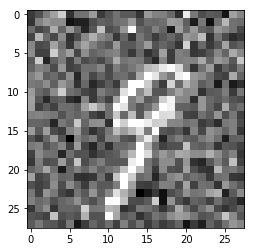

In [12]:
i = 3
plt.imshow(x_train[i], cmap='gray')
print('class =', y_train[i])

### Prepare the data

In [13]:
# convert class vectors to "one-hot" binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [14]:
y_train[i]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [15]:
def process_data(x):
    x = x.reshape(-1, 784)
    x = x.astype('float32')
    x /= 255
    return x

In [16]:
x_train = process_data(x_train)
x_test = process_data(x_test)
x_val = process_data(x_val)

In [17]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'validation samples')

600 train samples
5000 test samples
5000 validation samples


## Fully-connected NN

### Construct the network

In [18]:
# a fairly small network for speed
fcmodel = Sequential()
fcmodel.add(Dense(32, activation='relu', input_shape=(784,)))
fcmodel.add(Dense(32, activation='relu'))
# could include dropout, regularisation, ...
fcmodel.add(Dense(num_classes, activation='softmax'))

In [19]:
fcmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [20]:
fcmodel.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(),
                metrics=['accuracy'])

### Train the network

In [21]:
batch_size = 32
epochs = 50

In [22]:
history = fcmodel.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=2,
                      validation_data=(x_test, y_test))

Train on 600 samples, validate on 5000 samples
Epoch 1/50
 - 1s - loss: 2.3616 - acc: 0.1250 - val_loss: 2.3050 - val_acc: 0.1006
Epoch 2/50
 - 0s - loss: 2.3028 - acc: 0.1150 - val_loss: 2.3025 - val_acc: 0.1060
Epoch 3/50
 - 0s - loss: 2.3026 - acc: 0.1050 - val_loss: 2.3025 - val_acc: 0.1060
Epoch 4/50
 - 1s - loss: 2.3017 - acc: 0.1100 - val_loss: 2.3025 - val_acc: 0.1060
Epoch 5/50
 - 1s - loss: 2.3013 - acc: 0.1100 - val_loss: 2.3025 - val_acc: 0.1060
Epoch 6/50
 - 1s - loss: 2.3010 - acc: 0.1100 - val_loss: 2.3026 - val_acc: 0.1060
Epoch 7/50
 - 1s - loss: 2.3007 - acc: 0.1100 - val_loss: 2.3027 - val_acc: 0.1060
Epoch 8/50
 - 1s - loss: 2.3005 - acc: 0.1100 - val_loss: 2.3027 - val_acc: 0.1060
Epoch 9/50
 - 1s - loss: 2.3003 - acc: 0.1083 - val_loss: 2.3028 - val_acc: 0.1060
Epoch 10/50
 - 1s - loss: 2.3000 - acc: 0.1083 - val_loss: 2.3029 - val_acc: 0.1060
Epoch 11/50
 - 0s - loss: 2.2999 - acc: 0.1000 - val_loss: 2.3030 - val_acc: 0.1060
Epoch 12/50
 - 0s - loss: 2.2997 - acc

In [23]:
score = fcmodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.3052559871673584
Test accuracy: 0.0992


In [24]:
# really we should not look at the score for this set of data
# until we have finished tuning our model
score = fcmodel.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.3064027278900148
Test accuracy: 0.0972


In [25]:
def histplot(history):
    hist = pd.DataFrame(history.history)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    hist.plot(y=['loss', 'val_loss'], ax=ax1)
    min_loss = hist['val_loss'].min()
    ax1.hlines(min_loss, 0, len(hist), linestyle='dotted',
               label='min(val_loss) = {:.3f}'.format(min_loss))
    ax1.legend(loc='upper right')
    hist.plot(y=['acc', 'val_acc'], ax=ax2)
    max_acc = hist['val_acc'].max()
    ax2.hlines(max_acc, 0, len(hist), linestyle='dotted',
               label='max(val_acc) = {:.3f}'.format(max_acc))
    ax2.legend(loc='lower right', fontsize='large')

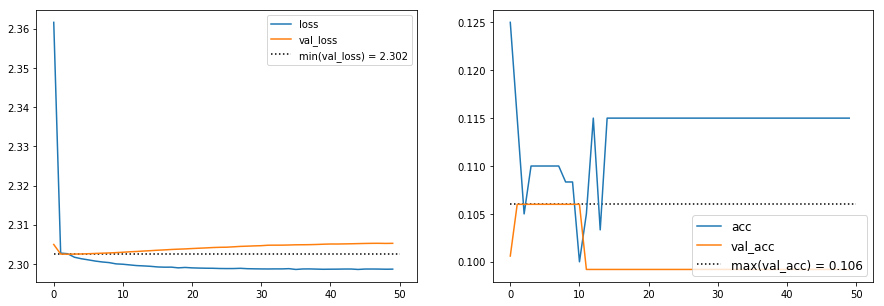

In [26]:
histplot(history)

## Convolutional Neural Network (CNN)

### Reshape the data

In [27]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

### Construct the network

In [28]:
# a fairly small network for speed
cnnmodel = Sequential()
cnnmodel.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnnmodel.add(MaxPooling2D((3, 3)))
cnnmodel.add(Conv2D(16, (3, 3), activation='relu'))
cnnmodel.add(MaxPooling2D((2, 2)))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(num_classes, activation='softmax'))
# could include dropout, regularisation, ...

In [29]:
cnnmodel.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(),
                metrics=['accuracy'])

In [30]:
cnnmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 16)          1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1450      
Total params: 2,698
Trainable params: 2,698
Non-trainable params: 0
_________________________________________________________________


In [31]:
# save weights for reinitialising below
cnnmodel.save_weights('/tmp/cnnmodel_init_weights.tf')


Consider using a TensorFlow optimizer from `tf.train`.


### Train the network

In [32]:
history = cnnmodel.fit(x_train, y_train,
                       batch_size=batch_size, 
                       epochs=3*epochs,
                       verbose=2,
                       validation_data=(x_test, y_test))

Train on 600 samples, validate on 5000 samples
Epoch 1/150
 - 3s - loss: 2.3448 - acc: 0.0900 - val_loss: 2.3039 - val_acc: 0.0936
Epoch 2/150
 - 1s - loss: 2.3050 - acc: 0.1017 - val_loss: 2.3068 - val_acc: 0.1296
Epoch 3/150
 - 1s - loss: 2.3021 - acc: 0.1200 - val_loss: 2.3077 - val_acc: 0.0992
Epoch 4/150
 - 1s - loss: 2.2998 - acc: 0.1133 - val_loss: 2.2997 - val_acc: 0.1078
Epoch 5/150
 - 1s - loss: 2.2972 - acc: 0.1183 - val_loss: 2.2976 - val_acc: 0.1290
Epoch 6/150
 - 1s - loss: 2.2972 - acc: 0.1567 - val_loss: 2.2975 - val_acc: 0.1430
Epoch 7/150
 - 1s - loss: 2.2942 - acc: 0.1433 - val_loss: 2.2947 - val_acc: 0.1432
Epoch 8/150
 - 1s - loss: 2.2929 - acc: 0.1333 - val_loss: 2.2927 - val_acc: 0.1416
Epoch 9/150
 - 1s - loss: 2.2870 - acc: 0.1417 - val_loss: 2.2999 - val_acc: 0.1038
Epoch 10/150
 - 1s - loss: 2.2884 - acc: 0.1383 - val_loss: 2.2905 - val_acc: 0.1748
Epoch 11/150
 - 1s - loss: 2.2856 - acc: 0.1750 - val_loss: 2.2853 - val_acc: 0.1894
Epoch 12/150
 - 1s - loss: 

Epoch 97/150
 - 1s - loss: 0.5716 - acc: 0.8300 - val_loss: 0.6518 - val_acc: 0.7974
Epoch 98/150
 - 1s - loss: 0.5910 - acc: 0.8250 - val_loss: 0.6262 - val_acc: 0.8040
Epoch 99/150
 - 1s - loss: 0.5465 - acc: 0.8317 - val_loss: 0.6526 - val_acc: 0.8036
Epoch 100/150
 - 1s - loss: 0.5537 - acc: 0.8217 - val_loss: 0.6293 - val_acc: 0.7982
Epoch 101/150
 - 1s - loss: 0.5565 - acc: 0.8267 - val_loss: 0.5794 - val_acc: 0.8204
Epoch 102/150
 - 1s - loss: 0.5407 - acc: 0.8317 - val_loss: 0.6587 - val_acc: 0.7878
Epoch 103/150
 - 1s - loss: 0.5734 - acc: 0.8217 - val_loss: 0.6251 - val_acc: 0.8068
Epoch 104/150
 - 1s - loss: 0.5205 - acc: 0.8500 - val_loss: 0.5958 - val_acc: 0.8212
Epoch 105/150
 - 1s - loss: 0.5219 - acc: 0.8533 - val_loss: 0.6130 - val_acc: 0.8040
Epoch 106/150
 - 1s - loss: 0.5144 - acc: 0.8333 - val_loss: 0.5871 - val_acc: 0.8172
Epoch 107/150
 - 1s - loss: 0.5346 - acc: 0.8417 - val_loss: 0.5860 - val_acc: 0.8194
Epoch 108/150
 - 1s - loss: 0.5282 - acc: 0.8400 - val_lo

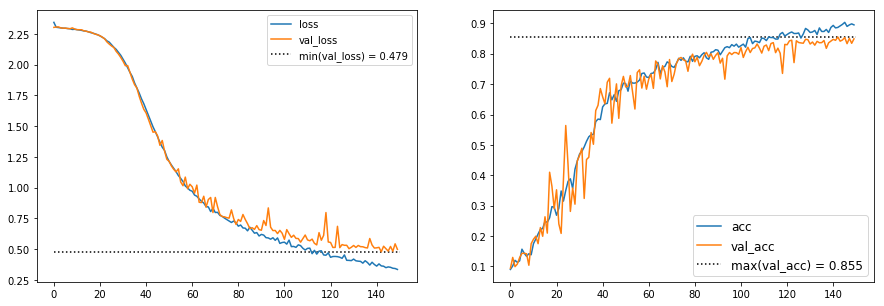

In [33]:
histplot(history)

## Online data augmentation

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=20.0,
    zoom_range=0.05)

#datagen.fit(x_train)  # only required if normalizing

In [35]:
gen = datagen.flow(x_train, y_train, batch_size=1)

label = 4


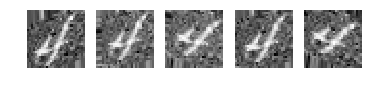

In [36]:
# run this several times to see more augmented examples
i = 3
fig, axarr = plt.subplots(1, 5)
for ax in axarr:
    img = gen[i][0][0, : , :, 0]
    ax.imshow(img, cmap='gray');
    ax.axis('off')
print('label =', gen[i][1][0].argmax())

In [37]:
# Reinitialise model
cnnmodel.load_weights('/tmp/cnnmodel_init_weights.tf')

In [38]:
cnnmodel.compile(loss='categorical_crossentropy',
                 optimizer=RMSprop(),
                 metrics=['accuracy'])

In [39]:
# fits the model on batches with real-time data augmentation:
# the accuracy continues to (slowly) rise, due to the augmentation
history = cnnmodel.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), 
                                 epochs=10*epochs,
                                 verbose=2,
                                 validation_data=(x_test, y_test))

Epoch 1/500
 - 2s - loss: 2.3487 - acc: 0.0861 - val_loss: 2.3039 - val_acc: 0.1126
Epoch 2/500
 - 1s - loss: 2.3059 - acc: 0.1174 - val_loss: 2.3052 - val_acc: 0.1042
Epoch 3/500
 - 1s - loss: 2.3056 - acc: 0.1014 - val_loss: 2.3015 - val_acc: 0.1130
Epoch 4/500
 - 1s - loss: 2.3007 - acc: 0.1020 - val_loss: 2.2992 - val_acc: 0.1170
Epoch 5/500
 - 1s - loss: 2.2991 - acc: 0.1085 - val_loss: 2.3050 - val_acc: 0.1090
Epoch 6/500
 - 1s - loss: 2.2989 - acc: 0.1261 - val_loss: 2.3008 - val_acc: 0.1500
Epoch 7/500
 - 1s - loss: 2.2974 - acc: 0.1217 - val_loss: 2.2966 - val_acc: 0.1650
Epoch 8/500
 - 1s - loss: 2.2953 - acc: 0.1464 - val_loss: 2.2955 - val_acc: 0.1220
Epoch 9/500
 - 1s - loss: 2.2970 - acc: 0.1327 - val_loss: 2.2924 - val_acc: 0.2192
Epoch 10/500
 - 1s - loss: 2.2927 - acc: 0.1432 - val_loss: 2.2913 - val_acc: 0.2548
Epoch 11/500
 - 1s - loss: 2.2917 - acc: 0.1601 - val_loss: 2.2893 - val_acc: 0.2330
Epoch 12/500
 - 1s - loss: 2.2901 - acc: 0.1682 - val_loss: 2.2900 - val_a

Epoch 98/500
 - 1s - loss: 0.9838 - acc: 0.6974 - val_loss: 0.7121 - val_acc: 0.7982
Epoch 99/500
 - 1s - loss: 0.9736 - acc: 0.6929 - val_loss: 0.7086 - val_acc: 0.8044
Epoch 100/500
 - 1s - loss: 0.9738 - acc: 0.6775 - val_loss: 0.7094 - val_acc: 0.8038
Epoch 101/500
 - 1s - loss: 0.9479 - acc: 0.7030 - val_loss: 0.6947 - val_acc: 0.7982
Epoch 102/500
 - 1s - loss: 0.9624 - acc: 0.7104 - val_loss: 0.7558 - val_acc: 0.7602
Epoch 103/500
 - 1s - loss: 0.9473 - acc: 0.6984 - val_loss: 0.7102 - val_acc: 0.7972
Epoch 104/500
 - 1s - loss: 0.9804 - acc: 0.6842 - val_loss: 0.7302 - val_acc: 0.7698
Epoch 105/500
 - 1s - loss: 0.9646 - acc: 0.6771 - val_loss: 0.6969 - val_acc: 0.8058
Epoch 106/500
 - 1s - loss: 0.9691 - acc: 0.6952 - val_loss: 0.6637 - val_acc: 0.8142
Epoch 107/500
 - 1s - loss: 0.9344 - acc: 0.7122 - val_loss: 0.7286 - val_acc: 0.7916
Epoch 108/500
 - 0s - loss: 0.9063 - acc: 0.7182 - val_loss: 0.6969 - val_acc: 0.7856
Epoch 109/500
 - 1s - loss: 0.9630 - acc: 0.6815 - val_l

Epoch 194/500
 - 1s - loss: 0.6964 - acc: 0.7900 - val_loss: 0.4881 - val_acc: 0.8454
Epoch 195/500
 - 1s - loss: 0.6396 - acc: 0.7933 - val_loss: 0.4617 - val_acc: 0.8596
Epoch 196/500
 - 1s - loss: 0.6302 - acc: 0.7923 - val_loss: 0.4330 - val_acc: 0.8728
Epoch 197/500
 - 1s - loss: 0.6056 - acc: 0.8345 - val_loss: 0.5041 - val_acc: 0.8358
Epoch 198/500
 - 1s - loss: 0.6321 - acc: 0.8021 - val_loss: 0.4669 - val_acc: 0.8542
Epoch 199/500
 - 1s - loss: 0.6035 - acc: 0.8064 - val_loss: 0.4791 - val_acc: 0.8484
Epoch 200/500
 - 0s - loss: 0.6546 - acc: 0.7988 - val_loss: 0.4624 - val_acc: 0.8580
Epoch 201/500
 - 1s - loss: 0.6470 - acc: 0.7911 - val_loss: 0.4392 - val_acc: 0.8730
Epoch 202/500
 - 1s - loss: 0.6607 - acc: 0.7769 - val_loss: 0.4267 - val_acc: 0.8734
Epoch 203/500
 - 1s - loss: 0.5627 - acc: 0.8169 - val_loss: 0.4191 - val_acc: 0.8768
Epoch 204/500
 - 1s - loss: 0.6662 - acc: 0.8021 - val_loss: 0.4490 - val_acc: 0.8594
Epoch 205/500
 - 1s - loss: 0.6565 - acc: 0.7944 - val

Epoch 290/500
 - 1s - loss: 0.4711 - acc: 0.8399 - val_loss: 0.3540 - val_acc: 0.8914
Epoch 291/500
 - 1s - loss: 0.4780 - acc: 0.8393 - val_loss: 0.3806 - val_acc: 0.8816
Epoch 292/500
 - 1s - loss: 0.4678 - acc: 0.8449 - val_loss: 0.3604 - val_acc: 0.8916
Epoch 293/500
 - 1s - loss: 0.4735 - acc: 0.8476 - val_loss: 0.3726 - val_acc: 0.8854
Epoch 294/500
 - 1s - loss: 0.4759 - acc: 0.8410 - val_loss: 0.3568 - val_acc: 0.8912
Epoch 295/500
 - 1s - loss: 0.5198 - acc: 0.8437 - val_loss: 0.3902 - val_acc: 0.8812
Epoch 296/500
 - 1s - loss: 0.5049 - acc: 0.8436 - val_loss: 0.3905 - val_acc: 0.8812
Epoch 297/500
 - 1s - loss: 0.5151 - acc: 0.8498 - val_loss: 0.3663 - val_acc: 0.8882
Epoch 298/500
 - 1s - loss: 0.4940 - acc: 0.8256 - val_loss: 0.3565 - val_acc: 0.8896
Epoch 299/500
 - 0s - loss: 0.4781 - acc: 0.8366 - val_loss: 0.3618 - val_acc: 0.8902
Epoch 300/500
 - 1s - loss: 0.5181 - acc: 0.8350 - val_loss: 0.3659 - val_acc: 0.8874
Epoch 301/500
 - 1s - loss: 0.5137 - acc: 0.8481 - val

Epoch 386/500
 - 0s - loss: 0.4291 - acc: 0.8536 - val_loss: 0.3473 - val_acc: 0.8956
Epoch 387/500
 - 1s - loss: 0.4302 - acc: 0.8537 - val_loss: 0.3312 - val_acc: 0.8956
Epoch 388/500
 - 1s - loss: 0.4258 - acc: 0.8695 - val_loss: 0.3948 - val_acc: 0.8722
Epoch 389/500
 - 1s - loss: 0.4227 - acc: 0.8618 - val_loss: 0.3139 - val_acc: 0.9000
Epoch 390/500
 - 1s - loss: 0.4522 - acc: 0.8684 - val_loss: 0.3604 - val_acc: 0.8872
Epoch 391/500
 - 1s - loss: 0.4094 - acc: 0.8602 - val_loss: 0.3191 - val_acc: 0.8998
Epoch 392/500
 - 1s - loss: 0.4153 - acc: 0.8750 - val_loss: 0.4113 - val_acc: 0.8706
Epoch 393/500
 - 1s - loss: 0.4033 - acc: 0.8706 - val_loss: 0.3273 - val_acc: 0.8970
Epoch 394/500
 - 1s - loss: 0.3887 - acc: 0.8701 - val_loss: 0.3324 - val_acc: 0.8974
Epoch 395/500
 - 1s - loss: 0.3899 - acc: 0.8701 - val_loss: 0.3500 - val_acc: 0.8926
Epoch 396/500
 - 1s - loss: 0.4097 - acc: 0.8712 - val_loss: 0.3397 - val_acc: 0.8948
Epoch 397/500
 - 1s - loss: 0.4555 - acc: 0.8444 - val

Epoch 482/500
 - 1s - loss: 0.3464 - acc: 0.8887 - val_loss: 0.3450 - val_acc: 0.8900
Epoch 483/500
 - 0s - loss: 0.3975 - acc: 0.8487 - val_loss: 0.3231 - val_acc: 0.9036
Epoch 484/500
 - 1s - loss: 0.3817 - acc: 0.8701 - val_loss: 0.3130 - val_acc: 0.9040
Epoch 485/500
 - 1s - loss: 0.4089 - acc: 0.8618 - val_loss: 0.3596 - val_acc: 0.8848
Epoch 486/500
 - 1s - loss: 0.4094 - acc: 0.8760 - val_loss: 0.3072 - val_acc: 0.9048
Epoch 487/500
 - 1s - loss: 0.3466 - acc: 0.8888 - val_loss: 0.3223 - val_acc: 0.9000
Epoch 488/500
 - 1s - loss: 0.3813 - acc: 0.8755 - val_loss: 0.3013 - val_acc: 0.9060
Epoch 489/500
 - 1s - loss: 0.4558 - acc: 0.8553 - val_loss: 0.3006 - val_acc: 0.9058
Epoch 490/500
 - 1s - loss: 0.3773 - acc: 0.8826 - val_loss: 0.2976 - val_acc: 0.9056
Epoch 491/500
 - 1s - loss: 0.3973 - acc: 0.8662 - val_loss: 0.3468 - val_acc: 0.8932
Epoch 492/500
 - 0s - loss: 0.3646 - acc: 0.8773 - val_loss: 0.3084 - val_acc: 0.9034
Epoch 493/500
 - 1s - loss: 0.3960 - acc: 0.8630 - val

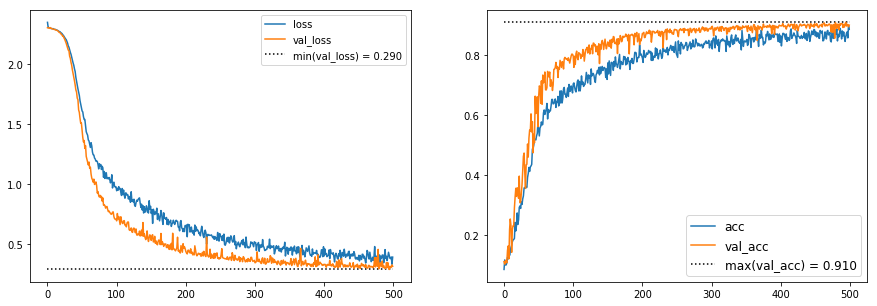

In [40]:
histplot(history)